# Revise linear function with Sigmoid function:

$f = sig(linear(x))$

- for two classes (1-D)
- Cost function:
   
    $cost(y,h) = -log(h), if y = 1 $
   
    $cost(y,h) = -log(1-h), if y = 0 $
    
    $cost(y,h) = -ylog(h) -(1-h)log(1-h)$


- The cost function is derived from the principle of maximum entropy.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
learning_rate = 0.01
training_epochs = 1000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

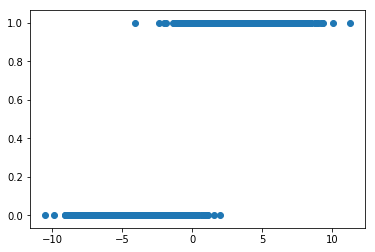

In [7]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

In [22]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")

w = tf.Variable([0., 0.], name="parameter", trainable=True)

# Using TF's sigmoid function
y_model = tf.sigmoid(w[1] * X + w[0])

# Cross-Entropy loss function
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1-Y) * tf.log(1 - y_model))

######  Cross-Entropy loss function in Tensorflow

* tf.reduce_mean
* tf.nn.softmax_cross_entropy_with_logits_v2

https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2

In [23]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        print(epoch, err)
    
#     w_val = sess.run(w, {X:xs, Y:ys})
    w_val = sess.run(w)
    print(w_val)

0 0.6931461
1 0.6546753
2 0.6199227
3 0.58850443
4 0.56006265
5 0.53426975
6 0.5108309
7 0.48948246
8 0.46999073
9 0.45214948
10 0.4357774
11 0.4207154
12 0.40682375
13 0.39398018
14 0.3820771
15 0.37102008
16 0.3607261
17 0.35112196
18 0.34214288
19 0.33373162
20 0.32583722
21 0.31841466
22 0.3114235
23 0.304828
24 0.2985958
25 0.29269794
26 0.28710833
27 0.28180385
28 0.27676293
29 0.27196673
30 0.26739758
31 0.26303983
32 0.25887907
33 0.25490218
34 0.25109705
35 0.2474528
36 0.24395923
37 0.24060714
38 0.23738803
39 0.234294
40 0.23131771
41 0.22845267
42 0.22569248
43 0.22303143
44 0.22046414
45 0.21798576
46 0.21559155
47 0.21327725
48 0.21103887
49 0.20887259
50 0.20677494
51 0.20474266
52 0.20277265
53 0.20086198
54 0.19900803
55 0.19720814
56 0.19545999
57 0.19376129
58 0.19210994
59 0.19050394
60 0.18894137
61 0.18742047
62 0.18593957
63 0.18449698
64 0.18309128
65 0.18172094
66 0.18038474
67 0.17908126
68 0.17780931
69 0.17656773
70 0.1753554
71 0.17417136
72 0.17301449
73 0

624 0.08252014
625 0.082494505
626 0.08246893
627 0.08244344
628 0.08241802
629 0.082392685
630 0.0823674
631 0.08234222
632 0.08231711
633 0.08229206
634 0.08226709
635 0.08224219
636 0.082217366
637 0.08219262
638 0.08216795
639 0.08214336
640 0.08211882
641 0.082094364
642 0.08206998
643 0.08204566
644 0.08202141
645 0.08199724
646 0.081973135
647 0.0819491
648 0.08192514
649 0.08190124
650 0.08187741
651 0.08185366
652 0.081829965
653 0.08180633
654 0.0817828
655 0.08175931
656 0.0817359
657 0.08171255
658 0.08168927
659 0.08166605
660 0.0816429
661 0.08161982
662 0.0815968
663 0.08157387
664 0.08155096
665 0.081528135
666 0.08150539
667 0.08148269
668 0.081460066
669 0.081437506
670 0.081415005
671 0.081392564
672 0.08137019
673 0.08134787
674 0.081325635
675 0.081303455
676 0.08128133
677 0.08125924
678 0.08123726
679 0.0812153
680 0.081193425
681 0.08117161
682 0.081149854
683 0.08112815
684 0.081106514
685 0.08108494
686 0.08106341
687 0.08104196
688 0.08102056
689 0.080999225


<function matplotlib.pyplot.show>

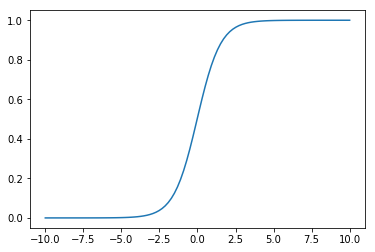

In [25]:
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
plt.show

### 多維度 (Input) Logistic Regression
Ex 1. 購買手機：

    Inputs:  3-D independent variables
        1. OS
        2. Size
        3. Cost
    Output: 1-D dependent variable
        Worth?

Ex 2. 城市中兩個地區的犯罪活動，找出在位置(6,4)的地方最有可能是屬於哪地區的犯罪？

    1. x: 經度
    2. y: 緯度
    
    Output M(x) :
    
$M(x; w) = sig(w_2x_2 + w_1x_1 + w_0)$

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.1
training_epochs = 2000

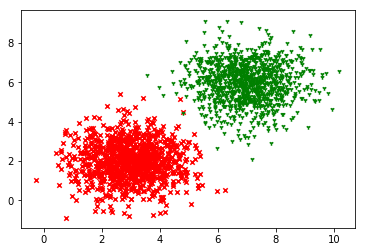

In [36]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)

In [30]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

In [31]:
y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

0 0.6931461
1 0.609286
2 0.6024527
3 0.59755385
4 0.59279335
5 0.5881558
6 0.583636
7 0.5792292
8 0.5749304
9 0.57073534
10 0.5666398
11 0.5626393
12 0.5587301
13 0.5549086
14 0.5511709
15 0.54751366
16 0.5439337
17 0.540428
18 0.5369934
19 0.53362733
20 0.5303267
21 0.52708936
22 0.5239126
23 0.5207943
24 0.5177322
25 0.514724
26 0.5117679
27 0.50886196
28 0.50600433
29 0.5031933
30 0.50042737
31 0.49770477
32 0.49502403
33 0.49238384
34 0.4897827
35 0.48721936
36 0.48469275
37 0.48220146
38 0.4797445
39 0.47732085
40 0.47492945
41 0.4725693
42 0.47023943
43 0.46793905
44 0.46566725
45 0.4634233
46 0.46120626
47 0.4590155
48 0.45685035
49 0.45470998
50 0.45259404
51 0.45050153
52 0.44843215
53 0.4463852
54 0.4443601
55 0.44235638
56 0.4403736
57 0.4384112
58 0.43646875
59 0.43454576
60 0.43264169
61 0.43075642
62 0.4288894
63 0.4270401
64 0.42520836
65 0.4233939
66 0.4215961
67 0.41981488
68 0.4180497
69 0.41630045
70 0.4145668
71 0.41284832
72 0.41114482
73 0.4094561
74 0.40778205
75

668 0.12156604
669 0.12143429
670 0.1213029
671 0.121171854
672 0.12104109
673 0.12091069
674 0.12078059
675 0.12065084
676 0.120521374
677 0.12039226
678 0.12026345
679 0.120134965
680 0.12000678
681 0.1198789
682 0.11975137
683 0.1196241
684 0.119497195
685 0.11937059
686 0.11924428
687 0.11911829
688 0.1189926
689 0.1188672
690 0.11874213
691 0.11861734
692 0.11849287
693 0.118368685
694 0.11824483
695 0.118121244
696 0.117997944
697 0.11787499
698 0.117752284
699 0.1176299
700 0.117507786
701 0.11738597
702 0.11726448
703 0.11714323
704 0.11702229
705 0.11690166
706 0.116781294
707 0.11666122
708 0.116541415
709 0.11642193
710 0.116302684
711 0.11618373
712 0.116065085
713 0.11594675
714 0.115828626
715 0.1157108
716 0.11559325
717 0.11547599
718 0.11535899
719 0.11524228
720 0.11512583
721 0.11500967
722 0.11489374
723 0.11477813
724 0.11466276
725 0.114547685
726 0.11443285
727 0.11431829
728 0.114204004
729 0.11408996
730 0.113976195
731 0.113862686
732 0.11374944
733 0.11363646

In [34]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

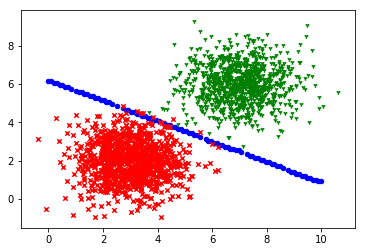

In [35]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()